<a href="https://colab.research.google.com/github/sarnavadatta/Finance-in-Python/blob/main/portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
#FAANG
assets=['FB','AMZN','AAPL','NFLX','GOOG']
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
stockStartDate='2013-01-01'
today=datetime.today().strftime('%Y-%m-%d')
today

'2021-11-09'

In [ ]:
# df=pd.DataFrame()
# for stock in assets:
#   df[stock]=web.DataReader(stock,data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

# df

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 11.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=8d17c6bf7f9463d0a41f1b645aace9c6292cd4867c9ab4a9b81ce71681676a46
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import datetime
import pandas as pd

start = datetime.datetime(2017,8,15)
end = datetime.datetime(2021,11,8)

df=[]
df=pd.DataFrame(df)
#Tickers=["BTC-USD","ETH-USD","XRP-USD","LTC-USD","ADA-USD","LINK-USD"]
#assets=['FB','AMZN','AAPL','NFLX','GOOG']
Tickers=assets
for ticker in Tickers:
  data= pd.DataFrame(yf.Ticker(ticker).history(start=start, end=end)['Close'])
  df=pd.concat([df, data], axis=1)

df.set_axis(Tickers, axis='columns', inplace=True)
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2017-08-15,171.000000,982.739990,38.500904,168.500000,922.219971
2017-08-16,170.000000,978.179993,38.346046,169.979996,926.960022
2017-08-17,166.910004,960.570007,37.609852,166.089996,910.979980
2017-08-18,167.410004,958.469971,37.524086,166.539993,910.669983
2017-08-21,167.779999,953.289978,37.454994,166.759995,906.659973
...,...,...,...,...,...
2021-11-01,329.980011,3318.110107,148.742920,681.169983,2875.479980
2021-11-02,328.079987,3312.750000,149.801376,677.719971,2917.260010
2021-11-03,331.619995,3384.000000,151.269241,688.289978,2935.800049


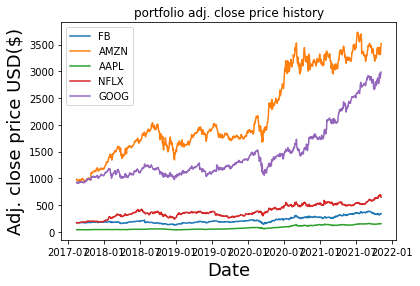

In [ ]:
title='portfolio adj. close price history'
my_stocks=df
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. close price USD($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [ ]:
#show daily simple returns
returns=df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2017-08-15,NaN,NaN,NaN,NaN,NaN
2017-08-16,-0.005848,-0.004640,-0.004022,0.008783,0.005140
2017-08-17,-0.018176,-0.018003,-0.019199,-0.022885,-0.017239
2017-08-18,0.002996,-0.002186,-0.002280,0.002709,-0.000340
2017-08-21,0.002210,-0.005404,-0.001841,0.001321,-0.004403
...,...,...,...,...,...
2021-11-01,0.019810,-0.016107,-0.005607,-0.013240,-0.030326
2021-11-02,-0.005758,-0.001615,0.007116,-0.005065,0.014530
2021-11-03,0.010790,0.021508,0.009799,0.015596,0.006355


In [ ]:
#create and show annualized covariance matrix
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.122789,0.066807,0.067985,0.068383,0.068277
AMZN,0.066807,0.095868,0.063498,0.076873,0.058978
AAPL,0.067985,0.063498,0.102147,0.062465,0.060935
NFLX,0.068383,0.076873,0.062465,0.156924,0.059578
GOOG,0.068277,0.058978,0.060935,0.059578,0.081095


In [ ]:
#portfolio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.07465509197344602

In [ ]:
#calculate portfolio volatility/ standard deviation
port_volatility=np.sqrt(port_variance)
port_volatility

0.27323084008480086

In [ ]:
#calculate the annual portfolio return
portfolio_simple_annual_return=np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.3330323452220299

In [ ]:
#show the expected annual return, volatility(risk), and variance
percent_var=str(round(port_variance,2)*100)+'%'
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_rets=str(round(portfolio_simple_annual_return,2)*100)+'%'

print('Expected annual returns: ', percent_rets)
print('annual volatility/risk: ', percent_vols)
print('annual variance: ', percent_var)

Expected annual returns:  33.0%
annual volatility/risk:  27.0%
annual variance:  7.000000000000001%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 4.4 MB/s 
     |████████████████████████████████| 2.8 MB 22.9 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# portfolio optimization

# calculate the expected returns and the annualised sample covariance matrix  of the asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimize max sharpe ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.0), ('AMZN', 0.2426), ('AAPL', 0.40439), ('NFLX', 0.12019), ('GOOG', 0.23283)])
Expected annual return: 36.0%
Annual volatility: 27.1%
Sharpe Ratio: 1.25


(0.3596685593582625, 0.2710968848529461, 1.2529415804335502)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 20000)

allocation, leftover = da.lp_portfolio()
print('discrete allocation: ', allocation)
print('funds remaining: ${:.2f}'.format(leftover))

discrete allocation:  {'AMZN': 1, 'AAPL': 52, 'NFLX': 4, 'GOOG': 2}
funds remaining: $61.93
